In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load data
z=pd.read_csv('Student_performance_data _.csv')

In [3]:
#data stat
z.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
#first five rows
z.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
#details of data
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
z.shape

(2392, 15)

In [7]:
z.isnull()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#sum of isnull
z.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
#duplicates
z[z.duplicated()]

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


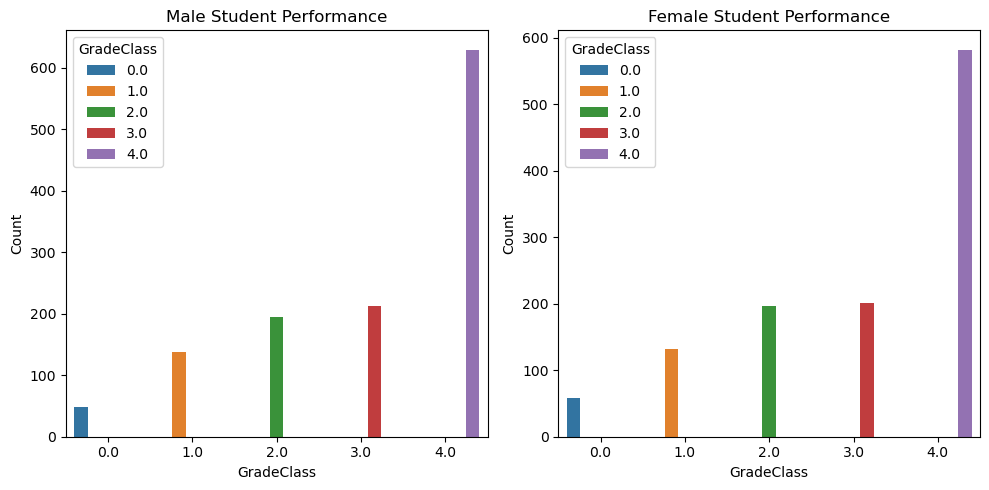

In [10]:
plt.figure(figsize=(10, 5))

# Plot for males
plt.subplot(1, 2, 1)
sns.countplot(x='GradeClass', data=z[z['Gender'] == 1],hue='GradeClass')
plt.title('Male Student Performance')
plt.xlabel('GradeClass')
plt.ylabel('Count')

# Plot for females
plt.subplot(1, 2, 2)
sns.countplot(x='GradeClass', data=z[z['Gender'] == 0],hue='GradeClass')
plt.title('Female Student Performance')
plt.xlabel('GradeClass')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

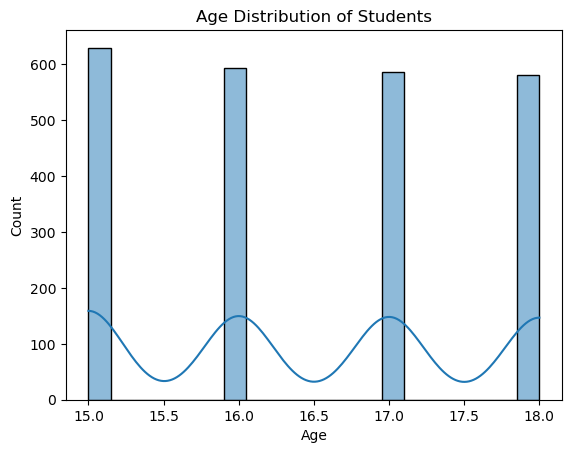

In [11]:
# Age distribution
sns.histplot(z['Age'], bins=20, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

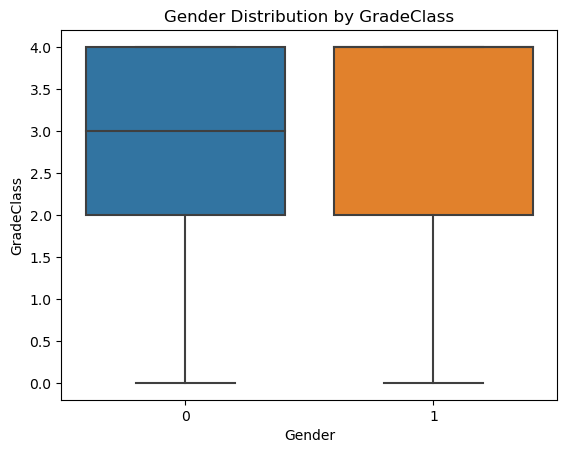

In [12]:
# Box plot for gender by GradeClass
sns.boxplot(x='Gender', y='GradeClass', data=z)
plt.title('Gender Distribution by GradeClass')
plt.xlabel('Gender')
plt.ylabel('GradeClass')
plt.show()

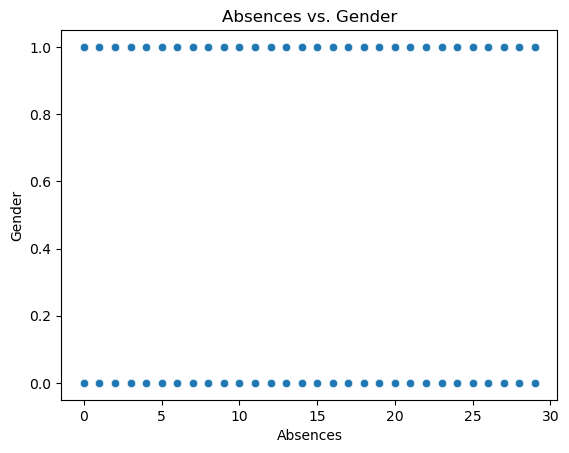

In [13]:
# Scatter plot for population vs. total bedrooms
sns.scatterplot(x='Absences', y='Gender', data=z)
plt.title('Absences vs. Gender')
plt.xlabel('Absences')
plt.ylabel('Gender')
plt.show()

In [14]:
# Preprocess data
selected_features = [
    'StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GPA'
]
X = z.drop(columns= ['GradeClass'])
y = z['GradeClass']

In [15]:
# Split data
train_X, val_X, train_y, val_y = train_test_split(
    X, y, random_state=42, train_size=0.8
)

In [16]:
# train data with KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform', algorithm='auto', leaf_size=50, p=2)
model.fit(train_X, train_y)

KNeighborsClassifier(leaf_size=50, metric='euclidean', n_neighbors=3)

In [17]:
y_pred = model.predict(val_X)
print(y_pred)

[4. 2. 0. 2. 4. 2. 4. 4. 2. 4. 1. 4. 1. 2. 3. 4. 4. 4. 4. 4. 2. 4. 4. 0.
 4. 4. 4. 2. 3. 4. 2. 4. 1. 1. 4. 3. 1. 1. 3. 4. 1. 0. 4. 3. 4. 2. 0. 4.
 0. 4. 0. 2. 4. 4. 0. 0. 0. 2. 4. 2. 4. 4. 1. 4. 4. 0. 3. 0. 4. 2. 2. 4.
 4. 1. 4. 1. 2. 4. 4. 4. 4. 4. 1. 4. 4. 4. 2. 4. 0. 4. 3. 4. 4. 4. 3. 4.
 0. 4. 4. 4. 4. 2. 4. 1. 4. 4. 3. 4. 4. 4. 2. 3. 1. 4. 4. 4. 3. 4. 4. 4.
 4. 0. 2. 4. 2. 4. 4. 4. 4. 1. 4. 2. 3. 4. 4. 4. 2. 4. 4. 3. 2. 2. 2. 4.
 2. 4. 4. 2. 0. 4. 0. 4. 1. 4. 4. 4. 4. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4. 4.
 3. 0. 4. 1. 1. 4. 4. 1. 1. 4. 2. 4. 2. 2. 4. 0. 1. 1. 3. 1. 4. 1. 4. 4.
 4. 4. 4. 4. 4. 2. 2. 1. 4. 2. 2. 0. 3. 4. 4. 1. 4. 4. 4. 4. 3. 1. 0. 4.
 2. 1. 3. 1. 4. 0. 0. 4. 4. 4. 2. 1. 4. 1. 4. 4. 1. 4. 2. 2. 4. 1. 2. 4.
 0. 4. 4. 1. 4. 4. 2. 4. 4. 4. 4. 1. 2. 4. 3. 3. 4. 2. 4. 4. 4. 2. 4. 1.
 1. 0. 2. 4. 1. 1. 4. 4. 3. 4. 4. 2. 4. 4. 4. 3. 2. 1. 3. 4. 1. 2. 1. 4.
 0. 4. 3. 3. 0. 4. 2. 4. 1. 4. 4. 1. 1. 4. 4. 2. 0. 4. 1. 4. 4. 4. 4. 4.
 4. 0. 4. 4. 2. 4. 1. 2. 2. 4. 4. 4. 2. 4. 1. 4. 1.

In [18]:
#accuracy score
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
accuracy = accuracy_score(val_y, val_prediction)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.5741127348643006


In [23]:
#train data with RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators = 100, random_state = 42) 
model_2.fit(train_X,train_y)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model_2.predict(val_X)
print(y_pred)

[4. 1. 3. 1. 4. 2. 3. 3. 3. 4. 3. 4. 2. 3. 2. 4. 4. 4. 3. 3. 4. 4. 4. 1.
 4. 4. 4. 2. 3. 3. 3. 4. 2. 1. 4. 4. 1. 2. 1. 4. 2. 0. 4. 3. 4. 3. 2. 4.
 2. 4. 1. 1. 4. 4. 4. 1. 3. 1. 4. 3. 4. 3. 3. 4. 4. 4. 1. 3. 4. 1. 0. 4.
 2. 2. 4. 2. 3. 4. 4. 4. 3. 1. 3. 4. 4. 4. 0. 4. 4. 4. 2. 4. 4. 4. 1. 4.
 1. 4. 4. 4. 4. 3. 4. 4. 4. 3. 2. 4. 4. 4. 4. 3. 1. 4. 4. 4. 3. 2. 4. 3.
 4. 1. 0. 4. 4. 4. 2. 4. 3. 2. 4. 0. 2. 4. 4. 4. 3. 4. 4. 4. 2. 4. 1. 4.
 2. 4. 4. 2. 1. 4. 1. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 3. 1. 4. 1. 1. 4. 4. 2. 3. 4. 3. 4. 2. 4. 4. 2. 2. 2. 1. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 4. 3. 2. 3. 4. 1. 2. 3. 2. 3. 4. 2. 3. 4. 4. 4. 4. 2. 2. 4.
 2. 1. 4. 2. 4. 2. 0. 4. 4. 4. 1. 2. 4. 4. 4. 3. 2. 4. 2. 2. 4. 2. 2. 4.
 0. 4. 4. 3. 4. 4. 3. 4. 4. 3. 4. 2. 3. 4. 3. 4. 4. 3. 4. 4. 3. 4. 4. 4.
 4. 1. 3. 4. 2. 3. 4. 1. 4. 4. 4. 3. 4. 4. 4. 2. 1. 2. 4. 4. 1. 3. 4. 4.
 4. 4. 0. 4. 2. 4. 2. 4. 1. 4. 4. 1. 2. 4. 4. 1. 3. 2. 4. 2. 4. 4. 4. 4.
 4. 4. 4. 4. 2. 3. 3. 4. 4. 4. 4. 3. 1. 4. 2. 4. 2.

In [25]:
#accuracy score
val_prediction = model_2.predict(val_X)
y_pred_proba = model_2.predict_proba(val_X)[:,1]
accuracy = accuracy_score(val_y, val_prediction)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9123173277661796
